In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [6]:
df=pd.read_csv(r"C:\Users\GIGABYTE\AppData\Local\Temp\0be729cf-4830-46b1-9864-fa580dcfd737_archive (1).zip.737\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df.duplicated().sum()

0

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


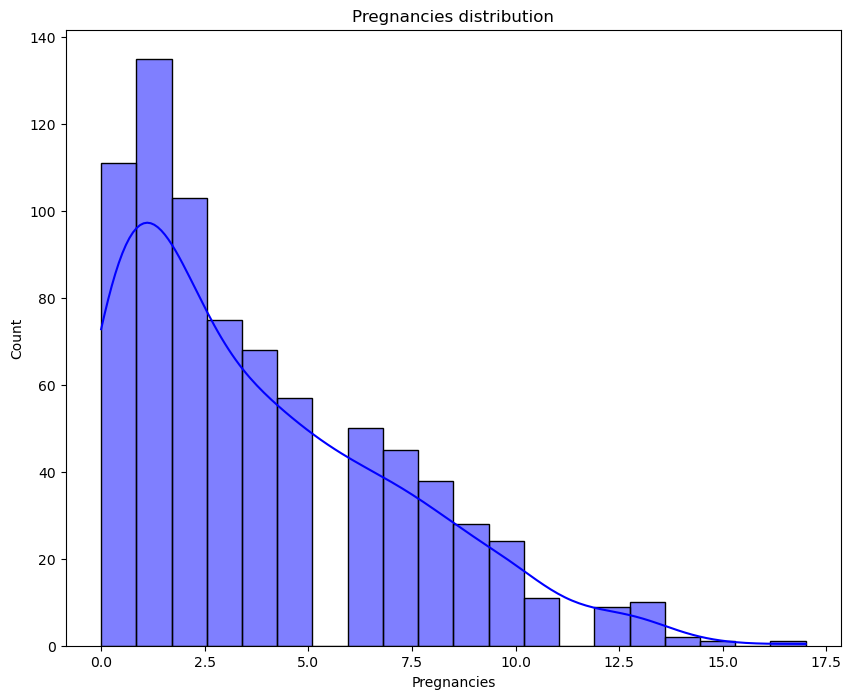

In [13]:
plt.figure(figsize=(10,8))
sns.histplot(df["Pregnancies"],kde=True,color="blue",bins=20, edgecolor="black")
plt.title("Pregnancies distribution")
plt.show()

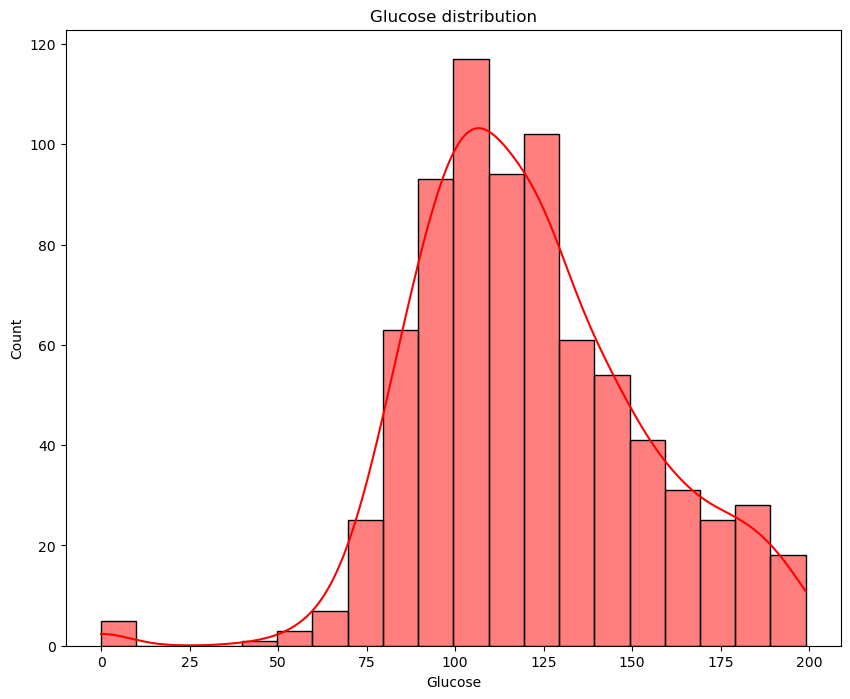

In [14]:
plt.figure(figsize=(10, 8))
sns.histplot(df["Glucose"], kde=True, bins=20, color="red", edgecolor="black")
plt.title("Glucose distribution")
plt.show()

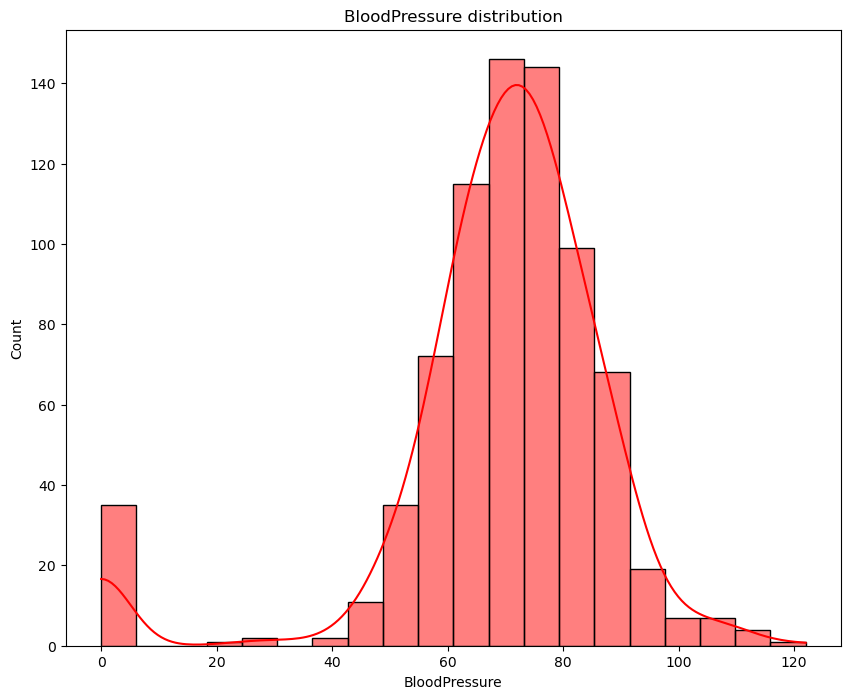

In [15]:
plt.figure(figsize=(10, 8))
sns.histplot(df["BloodPressure"], kde=True, bins=20, color="red", edgecolor="black")
plt.title("BloodPressure distribution")
plt.show()

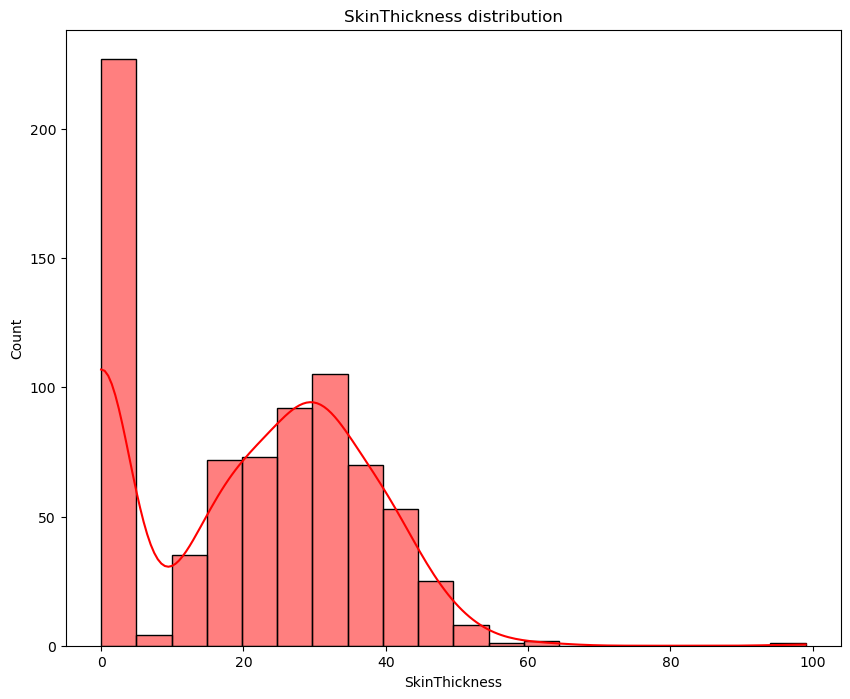

In [16]:
plt.figure(figsize=(10, 8))
sns.histplot(df["SkinThickness"], kde=True, bins=20, color="red", edgecolor="black")
plt.title("SkinThickness distribution")
plt.show()

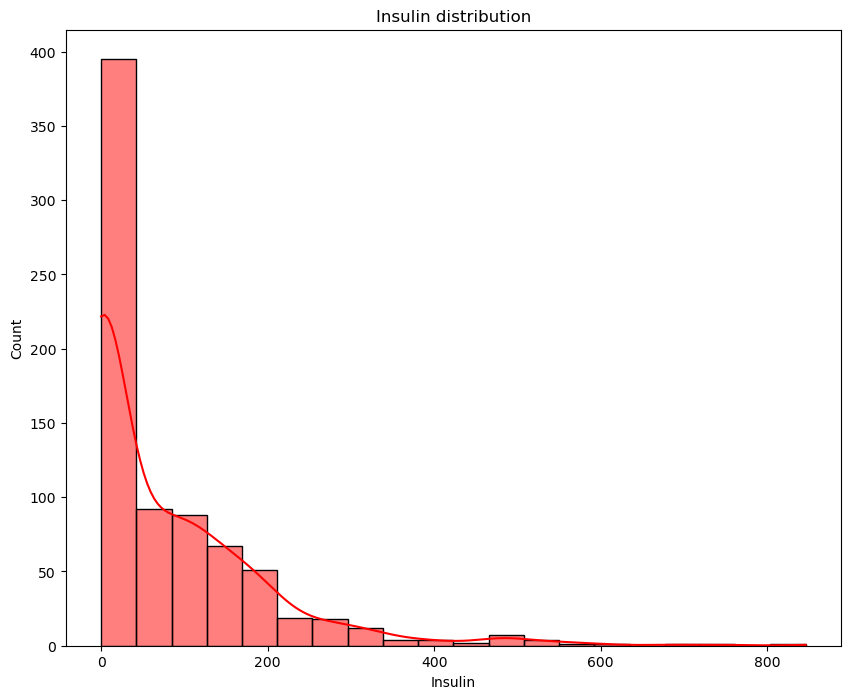

In [17]:
plt.figure(figsize=(10, 8))
sns.histplot(df["Insulin"], kde=True, bins=20, color="red", edgecolor="black")
plt.title("Insulin distribution")
plt.show()

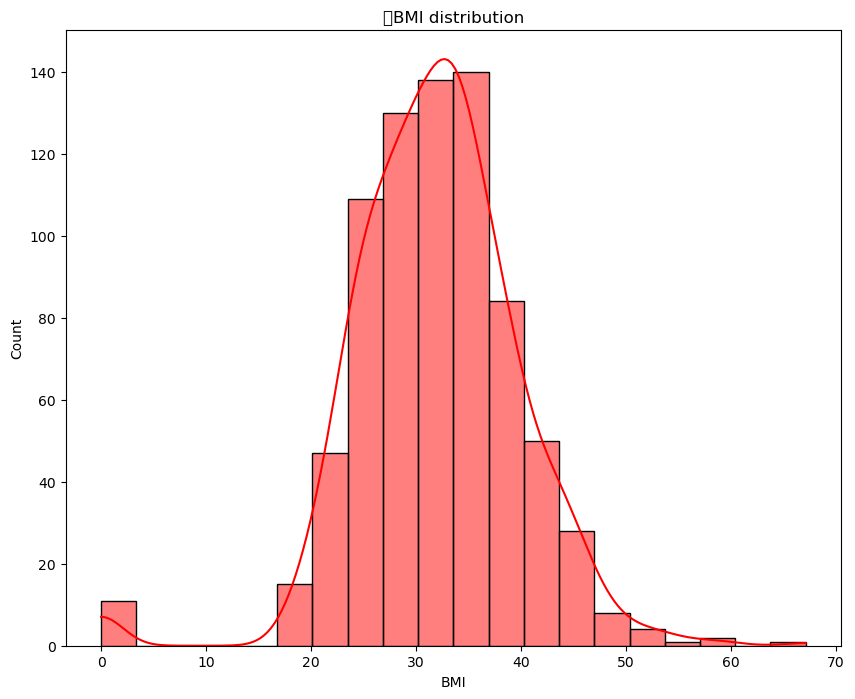

In [18]:
plt.figure(figsize=(10, 8))
sns.histplot(df["BMI"], kde=True, bins=20, color="red", edgecolor="black")
plt.title("	BMI distribution")
plt.show()

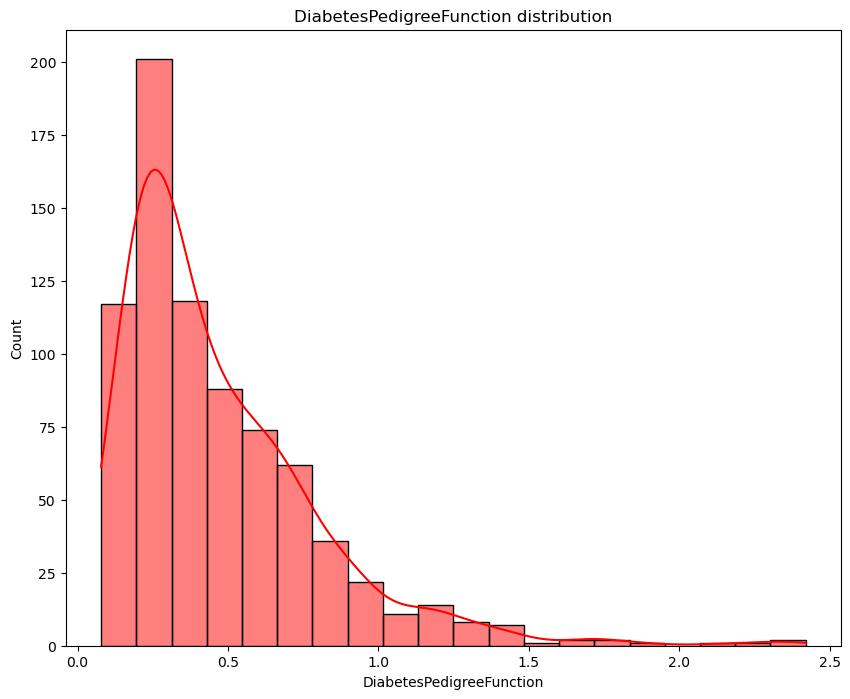

In [19]:
plt.figure(figsize=(10, 8))
sns.histplot(df["DiabetesPedigreeFunction"], kde=True, bins=20, color="red", edgecolor="black")
plt.title("DiabetesPedigreeFunction distribution")
plt.show()

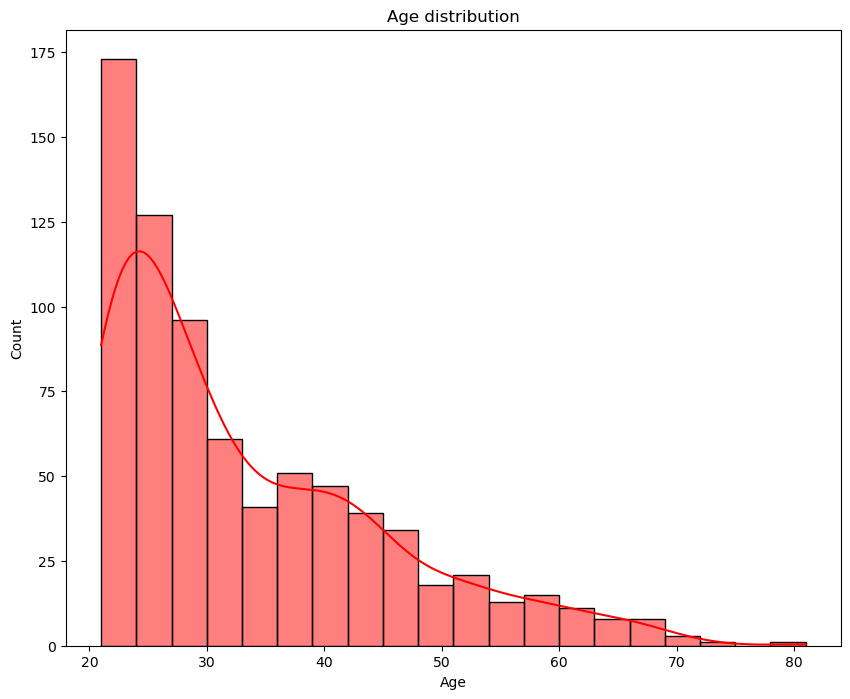

In [20]:
plt.figure(figsize=(10, 8))
sns.histplot(df["Age"], kde=True, bins=20, color="red", edgecolor="black")
plt.title("Age distribution")
plt.show()


In [21]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [22]:
scaler=StandardScaler()

In [23]:
df["Pregnancies"]=scaler.fit_transform(df[["Pregnancies"]])
df["Glucose"]=scaler.fit_transform(df[["Glucose"]])
df["BloodPressure"]=scaler.fit_transform(df[["BloodPressure"]])
df["SkinThickness"]=RobustScaler().fit_transform(df[["SkinThickness"]])
df["Insulin"]=RobustScaler().fit_transform(df[["Insulin"]])
df["BMI"]=scaler.fit_transform(df[["BMI"]])
df["DiabetesPedigreeFunction"]=scaler.fit_transform(df[["DiabetesPedigreeFunction"]])
df["Age"]=scaler.fit_transform(df[["Age"]])

In [24]:
x=df.drop(columns=["Outcome"],axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.37500,-0.239686,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.18750,-0.239686,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-0.71875,-0.239686,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.00000,0.499018,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.37500,1.080550,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,0.78125,1.174853,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.12500,-0.239686,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.00000,0.640472,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-0.71875,-0.239686,-0.240205,-0.371101,1.170732


In [25]:
y=df[["Outcome"]]
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.15,shuffle=True,random_state=42)


In [27]:
model=LogisticRegression()

In [28]:
model.fit(x_train,y_train)

LogisticRegression()

In [29]:
model.score(x_train,y_train)

0.7730061349693251

In [30]:
y_pred=model.predict(x_test)

In [31]:
model.predict_proba(x_test)

array([[0.72898243, 0.27101757],
       [0.81599628, 0.18400372],
       [0.88351447, 0.11648553],
       [0.79903191, 0.20096809],
       [0.52916543, 0.47083457],
       [0.59578853, 0.40421147],
       [0.98224268, 0.01775732],
       [0.38502649, 0.61497351],
       [0.45220848, 0.54779152],
       [0.26123126, 0.73876874],
       [0.7166162 , 0.2833838 ],
       [0.11257245, 0.88742755],
       [0.64649491, 0.35350509],
       [0.69437355, 0.30562645],
       [0.90942645, 0.09057355],
       [0.61187452, 0.38812548],
       [0.86958103, 0.13041897],
       [0.91697162, 0.08302838],
       [0.13600449, 0.86399551],
       [0.47460822, 0.52539178],
       [0.80065347, 0.19934653],
       [0.92456263, 0.07543737],
       [0.44600478, 0.55399522],
       [0.90614356, 0.09385644],
       [0.44262892, 0.55737108],
       [0.11257068, 0.88742932],
       [0.85648195, 0.14351805],
       [0.9659171 , 0.0340829 ],
       [0.77754158, 0.22245842],
       [0.88466216, 0.11533784],
       [0.

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        76
           1       0.64      0.70      0.67        40

    accuracy                           0.76       116
   macro avg       0.73      0.74      0.74       116
weighted avg       0.77      0.76      0.76       116



In [33]:
cm=confusion_matrix(y_test,y_pred)

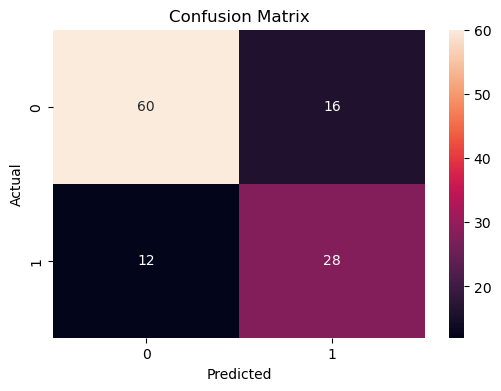

In [34]:
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [35]:
import joblib
joblib.dump(model,"LogisticRegression Model.pkl")

['LogisticRegression Model.pkl']